## Air Quality and Pollution Assessment

Task 1

Marium Waseem and Kovarthanan Kesavan 

Dataset: https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment/data

Github : https://github.com/MariumWaseem1/INM702

## Importing needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder


## Dataset Handling

In [2]:
df = pd.read_csv('updated_pollution_dataset.csv')
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (5000, 10)

Missing Values:
 Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


In [3]:
# Handle missing values if any
df = df.dropna()

In [4]:
df = pd.read_csv('updated_pollution_dataset.csv')
print("Columns:", df.columns.tolist())

Columns: ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality']


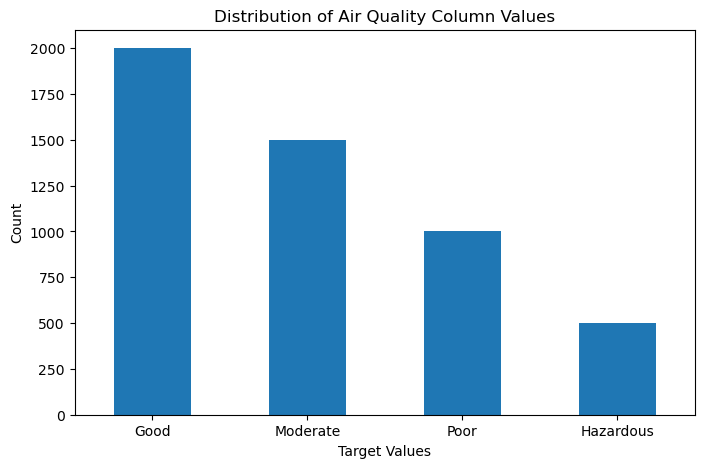

In [5]:
""" 
Visualizing distribution of the Air Quality columns 
"""
value_counts = df['Air Quality'].value_counts()

# Bar plot. 
plt.figure(figsize=(8, 5))
value_counts.plot(kind='bar')
plt.title('Distribution of Air Quality Column Values')
plt.xlabel('Target Values')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('./plots/task1_counts_of_air_quality_column_values.png')
plt.show()

## Dense Layer

In [6]:
class Dense_layer:
    """
    This class is used to define the dense layer in Neural Networks. 
    This included forward and backward propagation.
    """
    
    def __init__(self, n_inputs, n_neurons):
        """
        n_inputs: Number of inputs.
        n_neurons: Number of neurons in the layer

        Weights are defined with random values.
        Biases are defined as zeros.
        """
        self.weights = np.random.rand(
            n_inputs, n_neurons) * 0.01 # randomly initialized weights
        self.biases = np.zeros((1, n_neurons)) # biases intialized as zeros

    def forward_propagation(self, input_layer):
        self.input_layer = input_layer
        self.output_layer = np.dot(input_layer, self.weights) + self.biases
        return self.output_layer
    
    def backward_propagation(self, output_error, learning_rate):
        self.d_weights = np.dot(self.input_layer.T, output_error) / self.input_layer.shape[0]
        self.d_biases = np.sum(output_error, axis=0, keepdims=True) / self.input_layer.shape[0]
        self.d_inputs = np.dot(output_error, self.weights.T)

        # Update weights and biases
        self.weights -= learning_rate * self.d_weights
        self.biases -= learning_rate * self.d_biases

        return self.d_inputs

## Sigmoid - Activation Function

In [7]:
class Sigmoid:
    """ 
    This class represents the sigmoid activation function.
    """
    def __init__(self):
        pass
    
    def forward_propagation(self, input):
        self.inputs = input
        self.output = 1 / (1 + np.exp(-input))
        return self.output
    
    def backward_propagation(self, output_error):
        return output_error * (self.output * (1 - self.output))

## Relu Activation Function

In [8]:
class Relu:
    """ 
    This class is for define Rectified Linear Unit (Relu) activation funciton.
    """
    def __init__(self):
        pass
    
    def forward_propagation(self, input):
        self.input = input
        self.output = np.maximum(0, input)
        return self.output
    
    def backward_propagation(self, output_error):
        return output_error * (self.output > 0).astype(float)

## Softmax - Activation Function

In [9]:
class Softmax:
    """ 
    This class is for define Softmax activation funciton.
    """
    def __init__(self):
        pass
    
    def forward_propagation(self, input):
        self.input = input
        ex = np.exp(input - np.max(input, axis=1, keepdims=True))
        self.output = ex / np.sum(ex, axis=1, keepdims=True)
        return self.output
    
    def backward_propagation(self, output_error):
        input = self.output * \
            (output_error - np.sum(output_error * self.output, axis=1, keepdims=True))
        return input

## Dropout

In [10]:
class Dropout:
    def __init__(self, dropout_probabality):
        self.dropout_probabality = dropout_probabality
        self.mask = None

    def forward_propagation(self, input):
        if self.dropout_probabality < 1.0:
            self.mask = (np.random.rand(*input.shape) >
                         self.dropout_probabality) / (1 - self.dropout_probabality)

            return input * self.mask
        return input

    def backward_propagation(self, output_error):
        if self.dropout_probabality < 1.0:
            return output_error * self.mask
        return output_error

##  Optimizer 

BatchGD (Batch Gradient Descent)

In [11]:

class BatchGD:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
    
    def initialize(self, params):
        pass  # No initialization needed for basic gradient descent
    
    def update(self, params, gradients):
        # Update using full batch
        for layer_idx in range(len(params)):
            params[layer_idx]['weights'] -= self.learning_rate * gradients[layer_idx]['d_weights']
            params[layer_idx]['biases'] -= self.learning_rate * gradients[layer_idx]['d_biases']



MiniBatchGD (Mini-Batch Gradient Descent)

In [12]:
class MiniBatchGD:
    def __init__(self, learning_rate=0.01, batch_size=32):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
    
    def initialize(self, params):
        pass
    
    def update(self, params, gradients):
        for layer_idx in range(len(params)):
            params[layer_idx]['weights'] -= self.learning_rate * gradients[layer_idx]['d_weights']
            params[layer_idx]['biases'] -= self.learning_rate * gradients[layer_idx]['d_biases']

## Neural Network

In [13]:
class Neural_network:
    def __init__(self, optimizer_type='batch_gd', **optimizer_params):
        self.layers = []
        # NEW: Added optimizer selection based on type
        if optimizer_type == 'batch_gd':
            self.optimizer = BatchGD(**optimizer_params)
        else:
            self.optimizer = MiniBatchGD(**optimizer_params)

    def add_layer(self, layer, activation_func=None, dropout=None):
        self.layers.append(
            {"layer": layer, "activation_func": activation_func, "dropout": dropout})

    # Method to collect parameters for optimizer
    def get_parameters(self):
        params = []
        for layer_details in self.layers:
            if hasattr(layer_details["layer"], "weights"):
                params.append({
                    'weights': layer_details["layer"].weights,
                    'biases': layer_details["layer"].biases
                })
        return params

    # Method to collect gradients for optimizer
    def get_gradients(self):
        gradients = []
        for layer_details in self.layers:
            if hasattr(layer_details["layer"], "d_weights"):
                gradients.append({
                    'd_weights': layer_details["layer"].d_weights,
                    'd_biases': layer_details["layer"].d_biases
                })
        return gradients

    def forward_propagation(self, X):
        self.input = X
        for layer_details in self.layers:
            X = layer_details["layer"].forward_propagation(X)
            if layer_details["activation_func"] is not None:
                X = layer_details["activation_func"].forward_propagation(X)
            if layer_details["dropout"] is not None:
                X = layer_details["dropout"].forward_propagation(X)
        self.output = X
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        for layer_details in reversed(self.layers):
            if layer_details["dropout"]:
                output_error = layer_details["dropout"].backward_propagation(output_error)
            if layer_details["activation_func"]:
                output_error = layer_details["activation_func"].backward_propagation(output_error)
            output_error = layer_details["layer"].backward_propagation(output_error, learning_rate)
        
        # Update with optimizer
        params = self.get_parameters()
        gradients = self.get_gradients()
        self.optimizer.update(params, gradients)

    def train(self, X, y, epochs, learning_rate=0.01, batch_size=32):
        self.optimizer.initialize(self.get_parameters())
        
        for epoch in range(epochs):
            total_loss = 0
            
            #  batch gradient descent, using entire dataset
            if isinstance(self.optimizer, BatchGD):
                predictions = self.forward_propagation(X)
                loss = -np.mean(np.sum(y * np.log(predictions + 1e-7), axis=1))
                total_loss = loss
                output_error = predictions - y
                self.backward_propagation(output_error, learning_rate)
                avg_loss = total_loss
            
            # mini-batch, process in batches
            else:
                for i in range(0, X.shape[0], batch_size):
                    X_batch = X[i:i+batch_size]
                    y_batch = y[i:i+batch_size]
                    
                    predictions = self.forward_propagation(X_batch)
                    loss = -np.mean(np.sum(y_batch * np.log(predictions + 1e-7), axis=1))
                    total_loss += loss
                    
                    output_error = predictions - y_batch
                    self.backward_propagation(output_error, learning_rate)
                
                avg_loss = total_loss / (X.shape[0] // batch_size)
            
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

    def predict(self, X):
        prediction = self.forward_propagation(X)
        return np.argmax(prediction, axis=1)

## Data Preprocessing, Balancing, and Scaling for Air Quality Prediction

Loading the dataset and feature selection

In [14]:
df = pd.read_csv("updated_pollution_dataset.csv")

X = df.drop("Air Quality", axis=1).values
y = df["Air Quality"].values

One-hot encoding of the target variable

In [15]:
encoder = OneHotEncoder()
y_one_hot = encoder.fit_transform(y.reshape(-1, 1)).toarray()

Balancing the dataset using SMOTE

In [16]:
# Balance classes using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, np.argmax(y_one_hot, axis=1))

In [17]:
# Convert y_balanced back to numeric values (already integers after SMOTE)
y_balanced = np.array(y_balanced).reshape(-1, 1)

In [18]:
# One-hot encode the balanced target
y_balanced = encoder.fit_transform(y_balanced).toarray()

Data Split and Scaling features 

In [19]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)



In [20]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 Neural Network Initialization and Testing 

BatchGD

In [21]:
nn_batch = Neural_network(optimizer_type='BatchGD', learning_rate=0.01)
nn_batch.add_layer(Dense_layer(X_train.shape[1], 16), Relu(), Dropout(0.05))
nn_batch.add_layer(Dense_layer(16, 8), Relu(), Dropout(0.05))
nn_batch.add_layer(Dense_layer(8, 4), Softmax())


MiniBatchGD

In [22]:
nn_minibatch = Neural_network(optimizer_type='MiniBatchGD', learning_rate=0.01)
nn_minibatch.add_layer(Dense_layer(X_train.shape[1], 16), Relu(), Dropout(0.05))
nn_minibatch.add_layer(Dense_layer(16, 8), Relu(), Dropout(0.05))
nn_minibatch.add_layer(Dense_layer(8, 4), Softmax())

In [23]:
# Training the network with batch gradient descent
print("\nTraining with Batch Gradient Descent:")
nn_batch.train(X_train, y_train, epochs=300, learning_rate=0.01)  # No batch_size for full batch


Training with Batch Gradient Descent:
Epoch 1/300, Loss: 1.3863
Epoch 2/300, Loss: 1.3863
Epoch 3/300, Loss: 1.3863
Epoch 4/300, Loss: 1.3863
Epoch 5/300, Loss: 1.3863
Epoch 6/300, Loss: 1.3863
Epoch 7/300, Loss: 1.3863
Epoch 8/300, Loss: 1.3863
Epoch 9/300, Loss: 1.3863
Epoch 10/300, Loss: 1.3863
Epoch 11/300, Loss: 1.3863
Epoch 12/300, Loss: 1.3863
Epoch 13/300, Loss: 1.3863
Epoch 14/300, Loss: 1.3862
Epoch 15/300, Loss: 1.3862
Epoch 16/300, Loss: 1.3862
Epoch 17/300, Loss: 1.3862
Epoch 18/300, Loss: 1.3862
Epoch 19/300, Loss: 1.3862
Epoch 20/300, Loss: 1.3862
Epoch 21/300, Loss: 1.3862
Epoch 22/300, Loss: 1.3862
Epoch 23/300, Loss: 1.3862
Epoch 24/300, Loss: 1.3862
Epoch 25/300, Loss: 1.3861
Epoch 26/300, Loss: 1.3861
Epoch 27/300, Loss: 1.3861
Epoch 28/300, Loss: 1.3861
Epoch 29/300, Loss: 1.3860
Epoch 30/300, Loss: 1.3860
Epoch 31/300, Loss: 1.3859
Epoch 32/300, Loss: 1.3859
Epoch 33/300, Loss: 1.3858
Epoch 34/300, Loss: 1.3857
Epoch 35/300, Loss: 1.3856
Epoch 36/300, Loss: 1.385

In [24]:
# Training the network with mini-batch training
print("\nTraining with Mini-batch Gradient Descent:")
nn_minibatch.train(X_train, y_train, epochs=300, learning_rate=0.01, batch_size=64)


Training with Mini-batch Gradient Descent:
Epoch 1/300, Loss: 1.3863
Epoch 2/300, Loss: 1.3863
Epoch 3/300, Loss: 1.3863
Epoch 4/300, Loss: 1.3863
Epoch 5/300, Loss: 1.3863
Epoch 6/300, Loss: 1.3863
Epoch 7/300, Loss: 1.3863
Epoch 8/300, Loss: 1.3863
Epoch 9/300, Loss: 1.3863
Epoch 10/300, Loss: 1.3863
Epoch 11/300, Loss: 1.3862
Epoch 12/300, Loss: 1.3862
Epoch 13/300, Loss: 1.3862
Epoch 14/300, Loss: 1.3862
Epoch 15/300, Loss: 1.3862
Epoch 16/300, Loss: 1.3862
Epoch 17/300, Loss: 1.3862
Epoch 18/300, Loss: 1.3862
Epoch 19/300, Loss: 1.3862
Epoch 20/300, Loss: 1.3862
Epoch 21/300, Loss: 1.3862
Epoch 22/300, Loss: 1.3862
Epoch 23/300, Loss: 1.3862
Epoch 24/300, Loss: 1.3862
Epoch 25/300, Loss: 1.3862
Epoch 26/300, Loss: 1.3862
Epoch 27/300, Loss: 1.3862
Epoch 28/300, Loss: 1.3862
Epoch 29/300, Loss: 1.3862
Epoch 30/300, Loss: 1.3862
Epoch 31/300, Loss: 1.3862
Epoch 32/300, Loss: 1.3862
Epoch 33/300, Loss: 1.3862
Epoch 34/300, Loss: 1.3862
Epoch 35/300, Loss: 1.3862
Epoch 36/300, Loss: 

Network Evaluation 

In [25]:
# Network Evaluation for Batch GD
predictions = nn_batch.predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)
accuracy_batch = np.mean(predictions == y_test_labels)
print(f"Test Accuracy with Batch Gradient Descent: {accuracy_batch:.4f}")
saved_accuracy_batch = accuracy_batch


Test Accuracy with Batch Gradient Descent: 0.9344


In [26]:
# Network Evaluation for Mini-batch GD
predictions = nn_minibatch.predict(X_test)
accuracy_minibatch = np.mean(predictions == y_test_labels)
print(f"Test Accuracy with Mini-batch Gradient Descent: {accuracy_minibatch:.4f}")
saved_accuracy_minibatch = accuracy_minibatch


Test Accuracy with Mini-batch Gradient Descent: 0.9163


## Data visualization 

In [27]:
# Set pastel color palette
pastel_colors = ['#FFB3BA', '#BAFFC9', '#BAE1FF', '#FFFFBA']

# Visualizing Results of Different Configurations
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

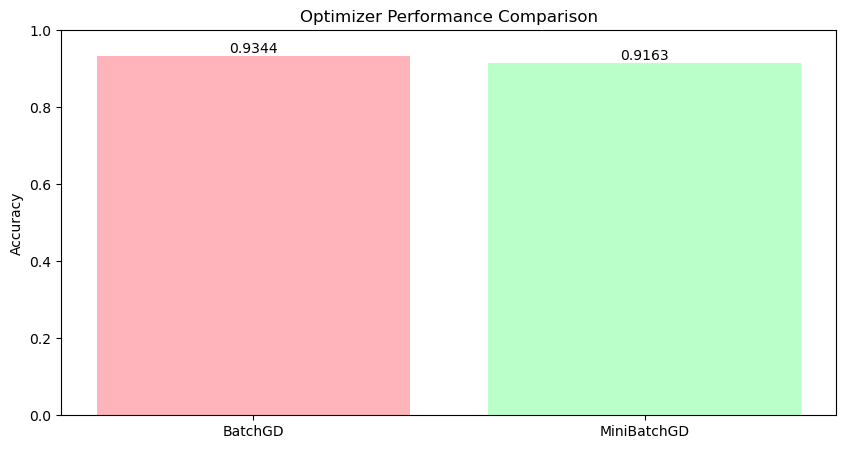

In [28]:
# optimizer comparision 
plt.figure(figsize=(10, 5))
optimizers = ['BatchGD', 'MiniBatchGD']
accuracies = [saved_accuracy_batch, saved_accuracy_minibatch]  
bars = plt.bar(optimizers, accuracies, color=pastel_colors[:2])  
plt.title('Optimizer Performance Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  

# Adding value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom')

plt.show()


# Hyperparameters Visualization

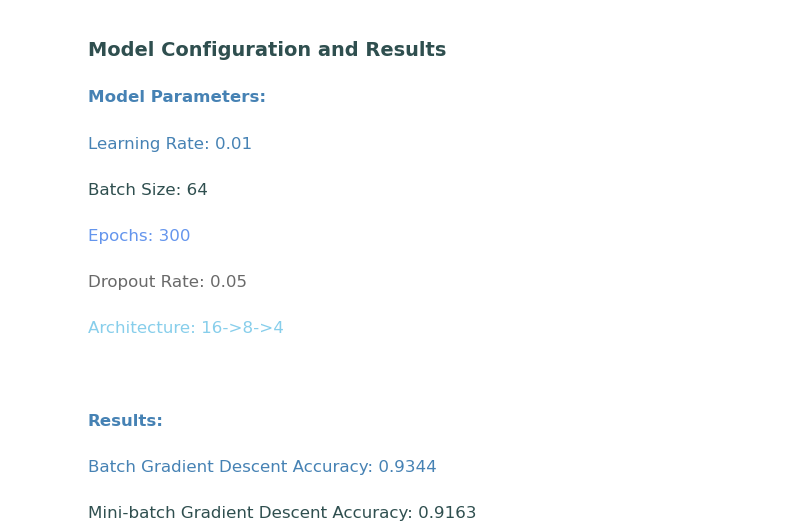

In [29]:
# Hyperparameters and Results Visualization

plt.figure(figsize=(10, 6))

# Create a table-like visualization for hyperparameters and results using the previously saved accuracy values
params = {
   'Model Parameters': {
       'Learning Rate': 0.01,
       'Batch Size': 64, 
       'Epochs': 300,
       'Dropout Rate': 0.05,
       'Architecture': '16->8->4'
   },
   'Results': {
       'Batch Gradient Descent Accuracy': f"{saved_accuracy_batch:.4f}",  # Using saved Batch GD accuracy
       'Mini-batch Gradient Descent Accuracy': f"{saved_accuracy_minibatch:.4f}"  # Using saved Mini-batch GD accuracy
   }
}

# Mix of blues and greys
colors = ['#4682B4',  # Steel Blue
         '#2F4F4F',  # Dark Slate Gray
         '#6495ED',  # Cornflower Blue
         '#696969',  # Dim Gray
         '#87CEEB']  # Sky Blue

# Clear table-like visualization
plt.text(0.1, 0.9, 'Model Configuration and Results', fontsize=14, fontweight='bold', color='#2F4F4F')  # Dark Slate Gray
y_pos = 0.8

# Parameters section
plt.text(0.1, y_pos, 'Model Parameters:', fontsize=12, fontweight='bold', color='#4682B4')  # Steel Blue
y_pos -= 0.1
for i, (param, value) in enumerate(params['Model Parameters'].items()):
   plt.text(0.1, y_pos, f"{param}: {value}", fontsize=12, color=colors[i % len(colors)])
   y_pos -= 0.1

# Results section
y_pos -= 0.1
plt.text(0.1, y_pos, 'Results:', fontsize=12, fontweight='bold', color='#4682B4')  # Steel Blue
y_pos -= 0.1
for i, (metric, value) in enumerate(params['Results'].items()):
   plt.text(0.1, y_pos, f"{metric}: {value}", fontsize=12, color=colors[i % len(colors)])
   y_pos -= 0.1

plt.axis('off')
plt.show()